In [1]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict 
# 这时defaultdict就能排上用场了，defaultdict的作用是在于，当字典里的key不存在但被查找时，返回的不是keyError而是一个默认值，这个默认值是什么呢，下面会说
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = WindyGridworldEnv()

In [3]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [28]:
np.ones(10);
q_tmp = defaultdict(lambda: np.zeros(5))
q_tmp
env.reset;
env.step;
env.action_space.n
defaultdict(lambda: np.zeros(env.action_space.n))

defaultdict(<function __main__.<lambda>()>, {})

In [22]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    # 可调用函数, lambda
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        # One step in the environment
        for t in itertools.count():
            # Take a step
            next_state, reward, done, p_tmp = env.step(action)
            
            for i in range(len(p_tmp)):
                if(i != 0):
                    print(i)
                
            
            # Pick the next action
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
    
            if done:
                break
                
            action = next_action
            state = next_state        
    
    return Q, stats

In [23]:
Q, stats = sarsa(env, 200)

Episode 200/200.

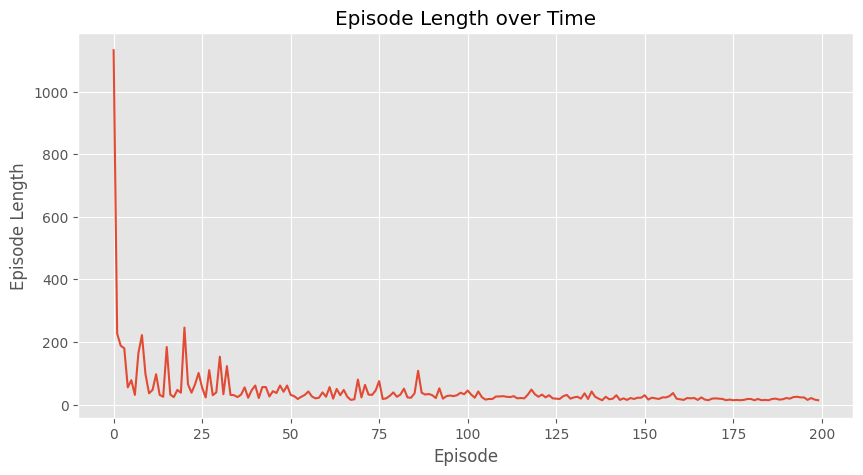

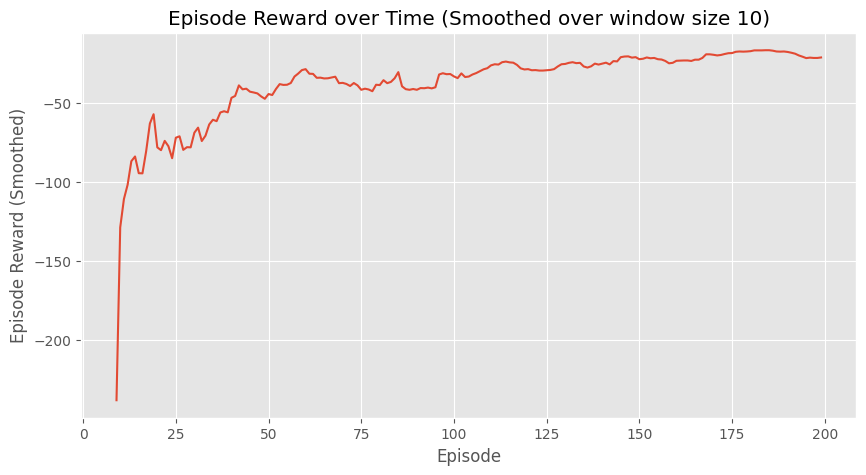

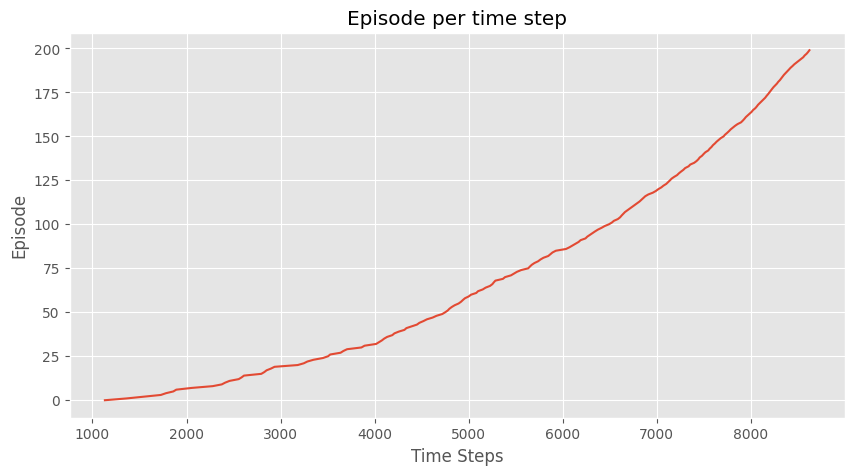

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [6]:
plotting.plot_episode_stats(stats)

In [7]:
Q

defaultdict(<function __main__.sarsa.<locals>.<lambda>()>,
            {30: array([-17.30524958, -16.42924947, -17.30306367, -17.50692551]),
             20: array([-16.51998191, -16.58026895, -16.47898789, -16.51779   ]),
             10: array([-16.195449  , -16.08734892, -16.10755592, -16.6159288 ]),
             0: array([-15.82316746, -16.01124756, -16.15299742, -15.72869175]),
             1: array([-15.66693634, -15.58653156, -15.51304366, -15.57126569]),
             2: array([-15.20961184, -14.51998141, -15.09105035, -15.20223226]),
             3: array([-14.82859961, -13.08284711, -14.72079023, -14.59793634]),
             4: array([-13.63068934, -12.4941715 , -13.40719283, -13.53575745]),
             5: array([-12.78434879, -11.31516884, -12.52133849, -13.48514273]),
             6: array([-12.15080331, -10.43198578, -11.97229811, -11.94179008]),
             7: array([-11.2266652 ,  -9.15133571, -11.33589527, -12.14325672]),
             8: array([ -9.31971937,  -8.389176